# Can We Detect Aurora on an Exoplanet (in IR/Radio)?
## Candidate: DS TucA and DS TucAb (warm Neptune)
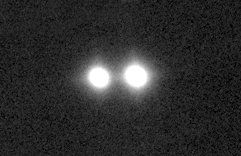

## 1. Stellar Wind (awsom)
### 1.0 Member: Meng

### 1.1 Input: Parameter
(description and picture)

### 1.2 Output: SEP spectrum
(description and picture)

## 2. GM (BATSRUS)
### 2.0 Member: Vishal

### 2.1 Input: Parameter (solar wind velocity, density)

Description: 
- Planetary magnetic field - Dipole, co-rotating or fixed inner magnetospheric plasma can be considered.
- Orientation of Dipole can be updated or fixed with time.

GSM coordinates: The origin is defined at the center of the Earth, and is positive towards the Sun. The y-axis is defined as the cross product of the GSM x-axis and the magnetic dipole axis; directed positive towards dusk. The z-axis is defined as the cross product of the x- and y-axes.

**Science parameters** (with typical values): 
- Density: 1e5
- Temperature: 1e6
- Velocity (3 components) -> in GSM coordinates: (-400,234,0) (Vx, Vy, Vz)
- Magnetic field (3 components) -> in GSM coordinates: (0, 0, 1e4) (Bx, By, Bz)
- F 10.7 given in Vladimir's run: 150

Request runs:  [https://ccmc.gsfc.nasa.gov/requests/GM/exo_user_registration.php].

Caveat with CCMC: 
- Dipole strength 0.05 - 1 times Earth's strength. 
- Density at 1.25 Re (5 to 500)
- Temperature at 1.25 Re (1500 to 5000)

For larger runs, contact the PI team at Michigan,
References:
1. https://geomodeling.njnu.edu.cn/modelItem/25c704c2-8253-4c5e-a597-193c218c353f
2. Example runs: https://ccmc.gsfc.nasa.gov/results/viewrun.php?domain=GM&runnumber=Vladimir_Airapetian_20190131_GM-EXO_3 
3. Example runs: https://ccmc.gsfc.nasa.gov/results/viewrun.php?domain=GM&runnumber=Vladimir_Airapetian_20180801_GM-EXO_1 

### 2.2 Output: patterns of particle precipitation, ionospheric electrodynamics 

Outputs include the s (atomic mass unit density N, pressure P, velocity V_x, V_y, V_z, magnetic field B_x, B_y, B_z, electric currents, J_x, J_y, J_z) and  (electric potential PHI, and Hall and Pedersen conductances Sigma_H, Sigma_P).

**Magnetospheric plasma parameter**
-  Code restart files
-  Plot files
-  Magnetospheric plasma parameters:
      - Atomic mass unit density N,
      - Pressure P
      - Velocity V_x, V_y, V_z,
      - Magnetic field B_x, B_y, B_z
      - Electric currents, J_x, J_y, J_z.
 
**ionospheric parameters**
- Electric potential PHI
- Hall and Pedersen conductances: $\sigma_H$, $\sigma_P$

You can request existing runs through: https://ccmc.gsfc.nasa.gov/ComQues/request_output.php?run=Vladimir_Airapetian_20190131_GM-EXO_3&domain=GM&model=SWMF

Example data from: https://ccmc.gsfc.nasa.gov/results/viewrun.php?domain=GM&runnumber=Andrey_Samsonov_120618_1

## Caveats and issues

The data we get for download from CCMC are in text format. The text are ill-suited for science since they are 2D projections, and are present in a non-trivial data formatting as text files. Hence, it is recommended to work with the 3D cubes themselves. I would like to emphasize that the the text data may be put up in appropriate format to be easily read, for example in python. A recommendation is to either make each parameter definition per line, or have them all in one line with uniform formatting. This will make it easier to load the files using pandas or text reader, for example in python.

The typical 2D snapshot (found in "data/it000101_003000_000.tec") is a text file that looks like this:

<img src="../data/batsrus_example.png" alt="Output data from BATSRUS code from CCMC" style="width:500px;"/>

## 3. Atmosphere (PWOM)
### 3.0 Member: Mei-Yun Lin

The PWOM model is employed to examine global ionospheric outflow for all the relevant ion species, including densities and temperatures. 

### 3.1 Input: Incident Stellar Flux Spectrum

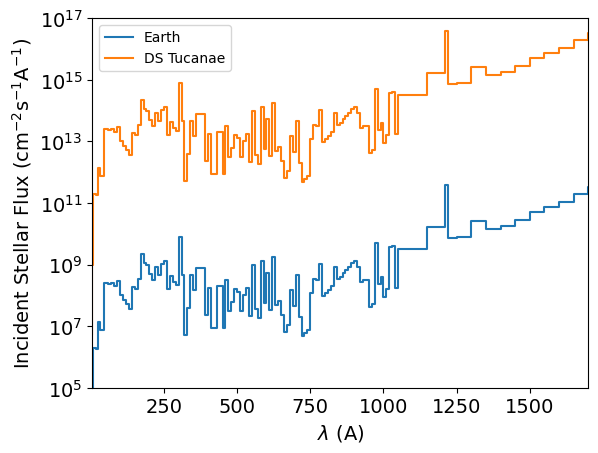

In [1]:
import numpy
import matplotlib
from matplotlib.pyplot import *

ssfile = open("../data/ssflux_euvac.dat", "r")

result_ssfile=ssfile.readline()

ssflux = numpy.zeros(246)
wavelength = numpy.zeros(246)

for j in range(123):
    result_ssfile = ssfile.readline().split()

    if(float(result_ssfile[2]) == 0 and j > 0):
        ssflux[2*j] = ssflux[2*j-1]
    else:
        ssflux[2*j] = (float(result_ssfile[2]))#/(float(result_ssfile[3]))
    wavelength[2*j] = float(result_ssfile[0])

    ssflux[2*j+1] = ssflux[2*j]#(float(result_ssfile[2]))#/(float(result_ssfile[3]))
    wavelength[2*j+1] = float(result_ssfile[1])

# print(wavelength)
# print(ssflux)

plot(wavelength[:], ssflux[:])

plot(wavelength[:], ssflux[:]*1E5)

xlabel("$\lambda$ (A)",fontsize=14)
ylabel("Incident Stellar Flux (cm$^{-2}$s$^{-1}$A$^{-1}$)",fontsize=14)

tick_params(axis='x',labelsize=14)
tick_params(axis='y',labelsize=14)

legend(("Earth","DS Tucanae"),loc='best')


axis([5,1700,1E5,1E17])

yscale('log')

### 3.2 Output: Ion density, such as H3+

In [2]:
total_files=397 #total alt point
total_figure= 1 #total figure number
total_number = 392
line_num = 5

f2 = open("../data/DSTucA_atmosphere.out","r")
TypeSolution = int(input("Compare Solutions of (1)Velocity (2)Density (3)Temperature: "))

#Read the compared (situation file) data
for w in range(5): #change this number if not compared with case1
    result_f2=f2.readline()

OplusSolution=numpy.zeros(total_files-line_num)
HplusSolution=numpy.zeros(total_files-line_num)
HeplusSolution = numpy.zeros(total_files-line_num)
NplusSolution=numpy.zeros(total_files-line_num)
ElectronSolution=numpy.zeros(total_files-line_num)
AltIndex=numpy.zeros(total_files-line_num)

for j in range(total_files-line_num):
    result_f2 = f2.readline().split()
    # print(result_f2)

    for i in range(27):
        result_f2[i] = float(result_f2[i])
    
    AltIndex[j]=result_f2[0]
        
    if(TypeSolution==3):
        OplusSolution[j]=result_f2[19]
        HplusSolution[j]=result_f2[20]
        HeplusSolution[j]=result_f2[21]
        NplusSolution[j]=result_f2[22]
        ElectronSolution[j]=result_f2[26]
 
    if(TypeSolution==2):
        OplusSolution[j]=result_f2[11]
        HplusSolution[j]=result_f2[12]
        HeplusSolution[j]=result_f2[13]
        NplusSolution[j]=result_f2[14]
        ElectronSolution[j]=result_f2[18]

    if(TypeSolution==1):
        OplusSolution[j]=result_f2[3]
        HplusSolution[j]=result_f2[4]
        HeplusSolution[j]=result_f2[5]
        NplusSolution[j]=result_f2[6]
        ElectronSolution[j]=result_f2[10]

Compare Solutions of (1)Velocity (2)Density (3)Temperature:  2


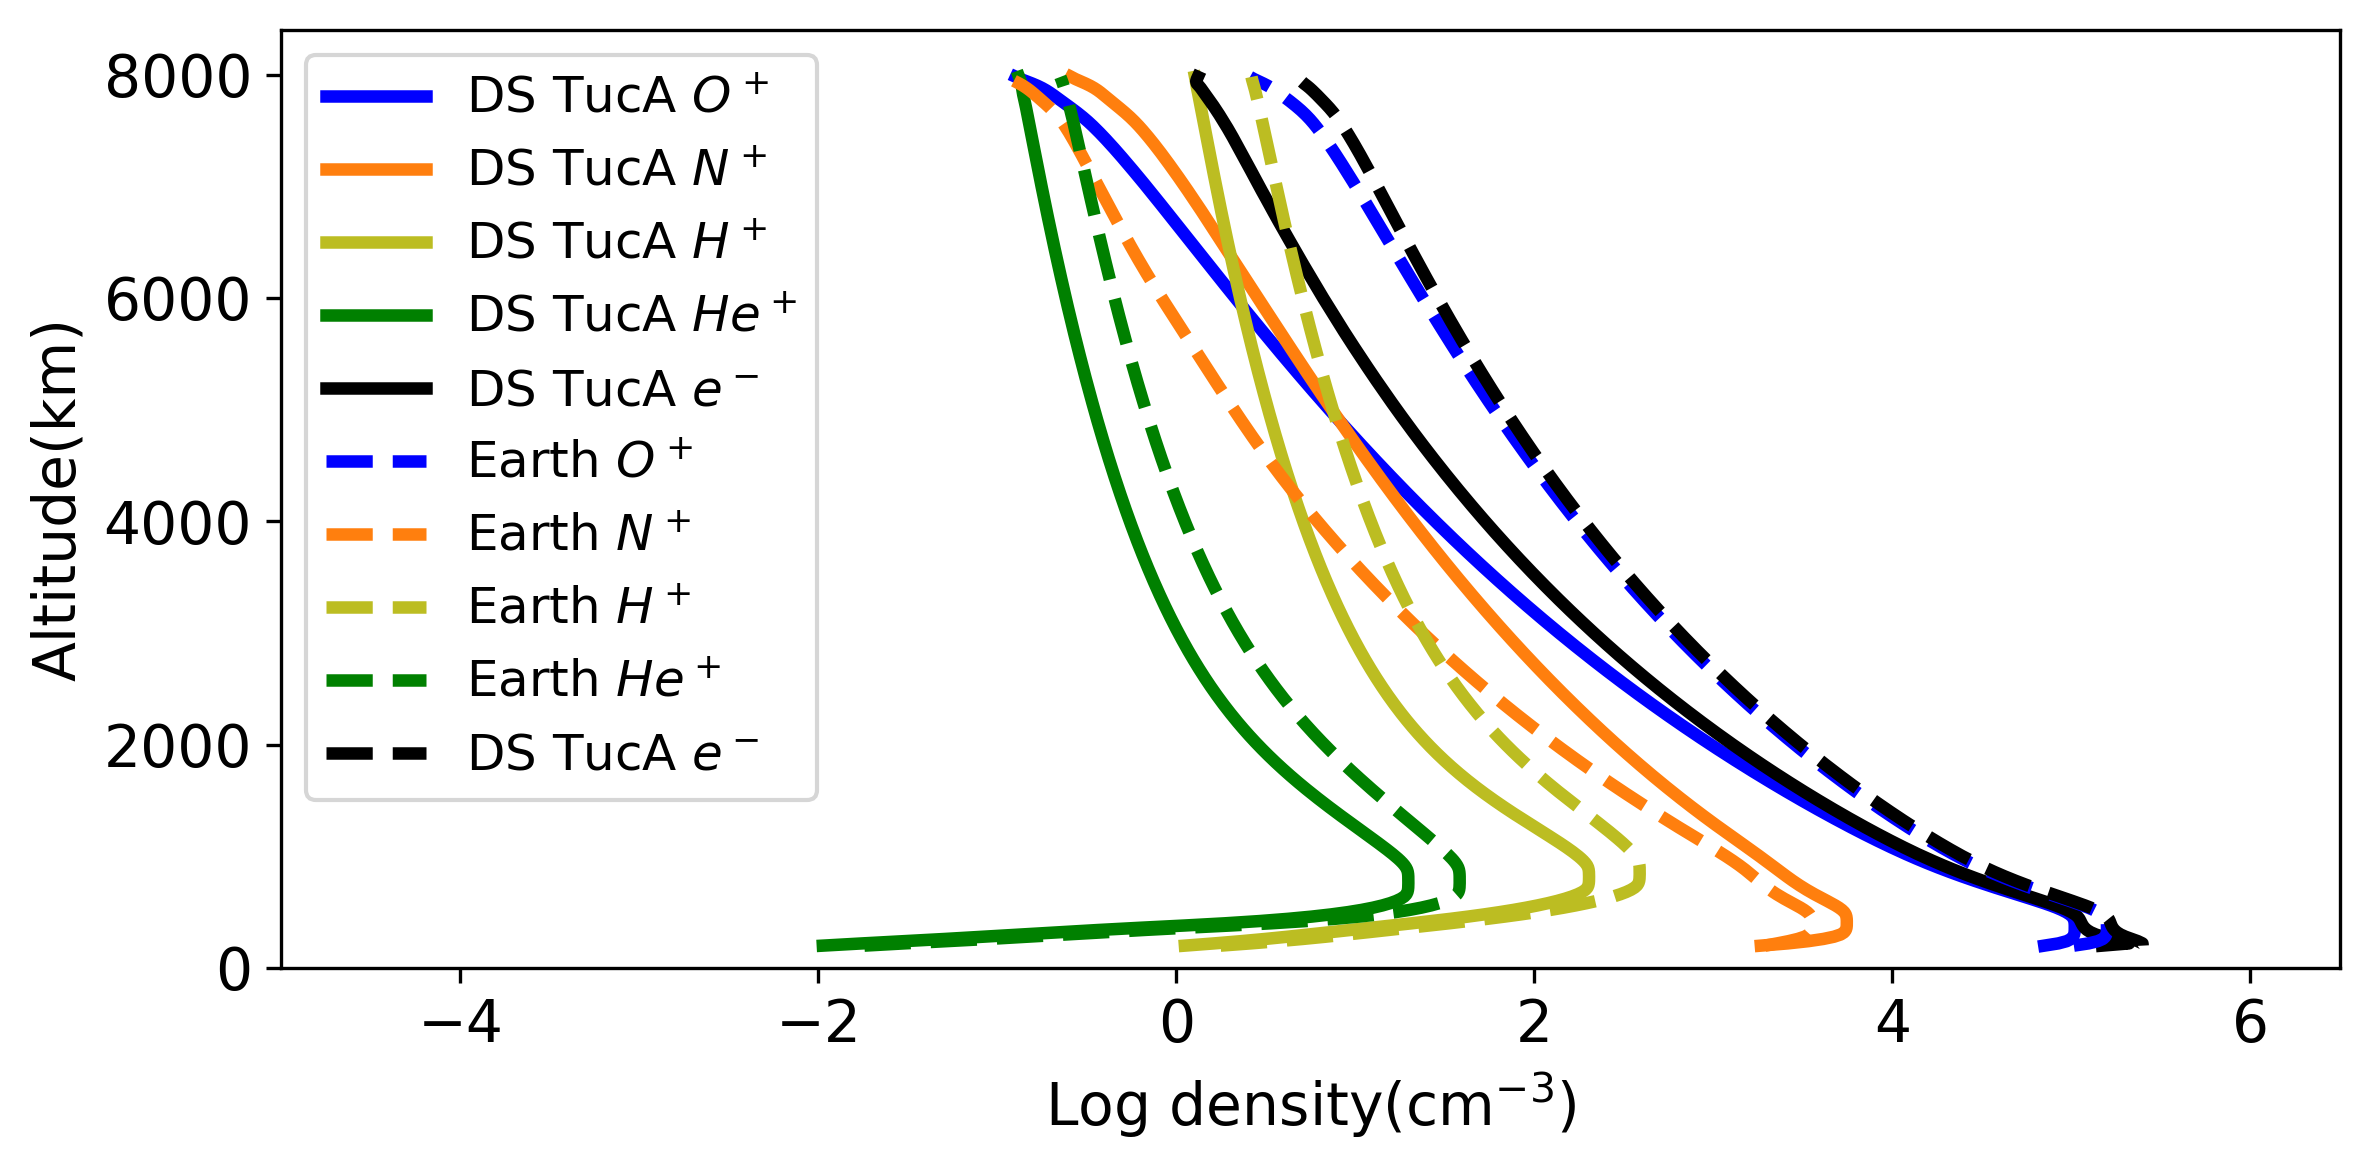

In [5]:
f2 = open("../data/Earth_atmosphere.out","r")
# TypeSolution = int(input("Compare Solutions of (1)Velocity (2)Density (3)Temperature: "))

#Read the compared (situation file) data
for w in range(5): #change this number if not compared with case1
    result_f2=f2.readline()

Earth_OplusSolution=numpy.zeros(total_files-line_num)
Earth_HplusSolution=numpy.zeros(total_files-line_num)
Earth_HeplusSolution = numpy.zeros(total_files-line_num)
Earth_NplusSolution=numpy.zeros(total_files-line_num)
Earth_ElectronSolution=numpy.zeros(total_files-line_num)
# AltIndex=numpy.zeros(total_files-line_num)

for j in range(total_files-line_num):
    result_f2 = f2.readline().split()
    # print(result_f2)

    for i in range(27):
        result_f2[i] = float(result_f2[i])
        
    if(TypeSolution==3):
        Earth_OplusSolution[j]=result_f2[19]
        Earth_HplusSolution[j]=result_f2[20]
        Earth_HeplusSolution[j]=result_f2[21]
        Earth_NplusSolution[j]=result_f2[22]
        Earth_ElectronSolution[j]=result_f2[26]
 
    if(TypeSolution==2):
        Earth_OplusSolution[j]=result_f2[11]
        Earth_HplusSolution[j]=result_f2[12]
        Earth_HeplusSolution[j]=result_f2[13]
        Earth_NplusSolution[j]=result_f2[14]
        Earth_ElectronSolution[j]=result_f2[18]

    if(TypeSolution==1):
        Earth_OplusSolution[j]=result_f2[3]
        Earth_HplusSolution[j]=result_f2[4]
        Earth_HeplusSolution[j]=result_f2[5]
        Earth_NplusSolution[j]=result_f2[6]
        Earth_ElectronSolution[j]=result_f2[10]

# figure(figsize=(4,4),dpi=300)

figure(figsize=(8,4),dpi=300)
end_index = 390
begin_index = 0

plot(OplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'b-',linewidth=3)
plot(NplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'C1-',linewidth=3)
plot(HplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'C8-',linewidth=3)
plot(HeplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'g-',linewidth=3)
plot(ElectronSolution[begin_index:end_index],AltIndex[begin_index:end_index], 'k-',linewidth=3)

plot(Earth_OplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'b--',linewidth=3)
plot(Earth_NplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'C1--',linewidth=3)
plot(Earth_HplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'C8--',linewidth=3)
plot(Earth_HeplusSolution[begin_index:end_index],AltIndex[begin_index:end_index],'g--',linewidth=3)
plot(Earth_ElectronSolution[begin_index:end_index],AltIndex[begin_index:end_index], 'k--',linewidth=3)

if(TypeSolution==2):
    # axis, label, title and figure name
    xlabel(r'Log density(cm$^{-3}$)',fontsize=14)
    ylabel("Altitude(km)",fontsize=14)
    # title("Time = "+str(part*(skip_every+1)+skip) +" min")
    # fname =name+"density_"+str(part)+'.png'
    axis([-5,6.5,0,8400])
elif(TypeSolution==3):
    # axis, label, title and figure name
    xlabel("Temperature(K)")
    ylabel("Altitude(km)")
    # fname = name+"temp_"+str(part)+'.eps'
    axis([0,4000,0,8400])
else:
    # axis, label, title and figure name
    xlabel("velocity(km/s)",fontsize=14)
    ylabel("Altitude(km)")
    # fname = name+"velocity_"+str(part)+'.eps'
    axis([-5,20,0,8400])
    # axis([-2,0.5,0,1200])

legend((r'DS TucA $O^+$',r'DS TucA $N^+$',r'DS TucA $H^+$',r'DS TucA $He^+$',r'DS TucA $e^-$',
        r'Earth $O^+$',r'Earth $N^+$',r'Earth $H^+$',r'Earth $He^+$',r'DS TucA $e^-$'),loc='best',prop={'size': 12})


tick_params(axis='y',labelsize=14)
tick_params(axis='x',labelsize=14)
tight_layout()

# savefig(fname,format='png')

## 4. Aurora (h3ppy)
### 4.0 Member: Caitlyn

### 4.1 Input: atmospheric profile, such as ion density
Paper : Detection of the infrared aurora at Uranus with Keck-NIRSPEC - Thomas et al. (2023) - https://www.nature.com/articles/s41550-023-02096-5

Ion density - taken from PWOM model.

Temperature

Spectral Resolution 

Wavelength Range

### 4.2 Output: Aurora observed by JWST
h3ppy open source code (GitHub) - https://github.com/henrikmelin/h3ppy/tree/master

(In terminal) - pip install h3ppy

/srv/conda/envs/notebook/lib/python3.11/site-packages/h3ppy


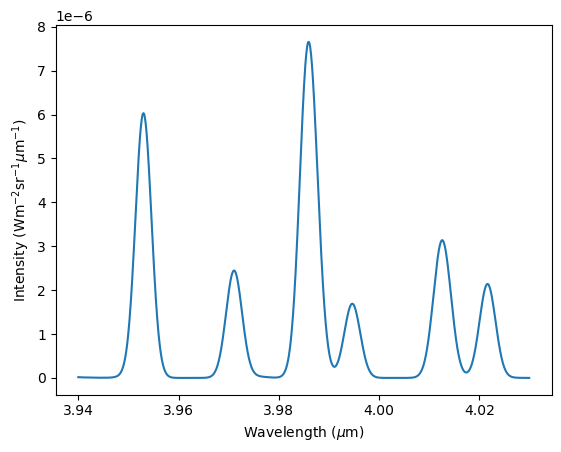

In [ ]:
#Example code:

# import these relevent packages
import h3ppy
import matplotlib.pyplot as plt
import numpy as np

# create H3+ object
h3p = h3ppy.h3p()

# define model parametres
ion_density = 1e14
temperature = 700
spectral_resolution = 1000
wavelength_range = h3p.wavegen(3.94, 4.03, 1024)

# generate model
model = h3p.model(density = ion_density, temperature = temperature, R = spectral_resolution, wavelength = wavelength_range)

# plot spectrum
fig, ax = plt.subplots()
ax.plot(wavelength_range, model)
#automatically sets axis labels
ax.set_xlabel(h3p.xlabel())
ax.set_ylabel(h3p.ylabel())
plt.show()